# Spotify: più di 160k canzoni dal 1921 al 2020

## Introduzione


Questo dataset si compone di più di 160.000 canzoni, rilasciate dal 1921 al 2020 (giugno). In particolare scegliamo come obiettivo analitico lo studio dei cambiamenti delle canzoni durante i vari decenni. Un focus particolare va fatto sulla popolarità, unica caratteristica "limitante". La popolarità di una canzone, infatti, non si intende come assoluta ma si basa sui dati di streaming.<br>
Per eseguire un'analisi adatta occorre importare le librerie necessarie.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
import random

## Pulizia

Importiamo il dataset e facciamo una prima analisi delle colonne.

In [2]:
songs = pd.read_csv("data.csv")
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169907 non-null  object 
 1   name              169907 non-null  object 
 2   artists           169907 non-null  object 
 3   duration_ms       169907 non-null  int64  
 4   release_date      169907 non-null  object 
 5   year              169907 non-null  int64  
 6   acousticness      169907 non-null  float64
 7   danceability      169907 non-null  float64
 8   energy            169907 non-null  float64
 9   instrumentalness  169907 non-null  float64
 10  liveness          169907 non-null  float64
 11  loudness          169907 non-null  float64
 12  speechiness       169907 non-null  float64
 13  tempo             169907 non-null  float64
 14  valence           169907 non-null  float64
 15  mode              169907 non-null  int64  
 16  key               16

Usando la funzione info() possiamo notare che abbiamo 169907 righe e che nessun valore risulta nullo.
Visualizziamo ora le prime righe del nostro dataset per avere esempi più concreti di valori possibili.

In [3]:
songs.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0


Risulta chiaro come, già da questi primi esempi, ci siano valori duplicati a meno dell'id (ad esempio le righe 3 e 4). Droppiamo quindi la colonna id.

In [4]:
songs.drop(["id"], axis=1, inplace=True)
songs.head()

,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
4,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0


Ora visualizziamo ed eliminiamo i duplicati.

In [5]:
songs[songs.duplicated()]

,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
1134,"18 German Dances and Ecossaises, D. 783: No. 6...","['Franz Schubert', 'William Kapell']",35093,1945,1945,0.9660,0.270,0.41100,0.87100,0.1440,-12.265,0.0949,189.704,0.3150,1,10,0,0
1136,"18 German Dances and Ecossaises, D. 783: No. 7...","['Franz Schubert', 'William Kapell']",44707,1945,1945,0.9950,0.404,0.12200,0.45900,0.0896,-19.706,0.0514,137.046,0.4710,1,10,0,0
1142,"18 Wiener Damen Ländler und Ecossaisen, D. 734...","['Franz Schubert', 'William Kapell']",59373,1945,1945,0.9880,0.666,0.29700,0.67900,0.1400,-15.679,0.1900,81.359,0.2860,1,7,0,0
1677,"3 Romanzen, Op. 28: 2. Einfach","['Robert Schumann', 'William Kapell']",208640,1945,1945,0.9920,0.286,0.02310,0.91900,0.2130,-25.210,0.0329,75.078,0.0931,1,6,0,0
1762,"36 Original Dances, D. 365: No. 26, Deutscher ...","['Franz Schubert', 'William Kapell']",37867,1945,1945,0.9810,0.697,0.18700,0.94600,0.3010,-17.202,0.0772,92.180,0.4200,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161255,Work / Final Rent Notice,['Charlie Chaplin'],538086,1931,1931,0.6900,0.410,0.20200,0.75100,0.1570,-11.023,0.0543,99.483,0.2390,1,6,0,0
163246,You Don't Know Me - Radio Edit,"['Jax Jones', 'RAYE']",255307,6/12/20,2020,0.0701,0.881,0.69700,0.00001,0.2740,-8.374,0.1320,124.037,0.7260,0,11,1,1
165949,"Étude in C-Sharp Minor, Op. 10, No. 4","['Frédéric Chopin', 'Vladimir Horowitz']",127307,1928,1928,0.9880,0.221,0.30400,0.90100,0.1120,-18.909,0.0320,169.587,0.4430,0,1,0,0
165955,"Étude in C-Sharp Minor, Op. 25, No. 7","['Frédéric Chopin', 'Vladimir Horowitz']",328267,1928,1928,0.9920,0.244,0.00793,0.93400,0.0878,-32.492,0.0340,93.048,0.0691,0,1,0,0


In [6]:
songs.drop_duplicates(inplace=True)

Verifichiamo l'eliminazione dei duplicati.

In [7]:
songs[songs.duplicated()]

,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit


In [8]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169319 entries, 0 to 169906
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              169319 non-null  object 
 1   artists           169319 non-null  object 
 2   duration_ms       169319 non-null  int64  
 3   release_date      169319 non-null  object 
 4   year              169319 non-null  int64  
 5   acousticness      169319 non-null  float64
 6   danceability      169319 non-null  float64
 7   energy            169319 non-null  float64
 8   instrumentalness  169319 non-null  float64
 9   liveness          169319 non-null  float64
 10  loudness          169319 non-null  float64
 11  speechiness       169319 non-null  float64
 12  tempo             169319 non-null  float64
 13  valence           169319 non-null  float64
 14  mode              169319 non-null  int64  
 15  key               169319 non-null  int64  
 16  popularity        169319 

Nell'eliminazione dei duplicati, possiamo notare come le colonne release_date e year siano simili perché le canzoni vecchie hanno come informazione solo l'anno di uscita. Ci conviene quindi eliminare anche la colonna release_date.

In [9]:
songs.drop(["release_date"], axis=1, inplace=True)
songs.head()

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,!Que Vida! - Mono Version,['Love'],220560,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,"""40""",['U2'],157840,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,"""40"" - Live",['U2'],226200,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,"""40"" - Remastered 2008",['U2'],157667,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
4,"""40"" - Remastered 2008",['U2'],157667,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0


Sono rimasti alcuni duplicati che differiscono solo per la popolarità: è un caso comune quando si hanno singoli, album, remastered... Possiamo quindi usare la funzione drop_duplicates() appplicata a tutte le colonne eccetto la popularity.

In [10]:
columns_wo_popularity = ["name", "artists", "duration_ms", "year", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "mode", "key", "explicit"]
songs.drop_duplicates(subset=columns_wo_popularity, inplace=True)
songs.head()

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,!Que Vida! - Mono Version,['Love'],220560,1966,0.525000,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,"""40""",['U2'],157840,1983,0.228000,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,"""40"" - Live",['U2'],226200,1983,0.099800,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,"""40"" - Remastered 2008",['U2'],157667,1983,0.185000,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
5,"""45""",['The Gaslight Anthem'],202493,2012,0.000696,0.315,0.970,0.00000,0.277,-4.709,0.1020,178.068,0.423,1,8,48,0


In [11]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167367 entries, 0 to 169906
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              167367 non-null  object 
 1   artists           167367 non-null  object 
 2   duration_ms       167367 non-null  int64  
 3   year              167367 non-null  int64  
 4   acousticness      167367 non-null  float64
 5   danceability      167367 non-null  float64
 6   energy            167367 non-null  float64
 7   instrumentalness  167367 non-null  float64
 8   liveness          167367 non-null  float64
 9   loudness          167367 non-null  float64
 10  speechiness       167367 non-null  float64
 11  tempo             167367 non-null  float64
 12  valence           167367 non-null  float64
 13  mode              167367 non-null  int64  
 14  key               167367 non-null  int64  
 15  popularity        167367 non-null  int64  
 16  explicit          167367 

Notiamo che l'artista è scritto tra apici singoli e parentesi quadre, ma li rimuoviamo per avere dei dati più leggibili.

In [12]:
songs["artists"] = songs["artists"].str.replace("[", "")
songs["artists"] = songs["artists"].str.replace("]", "")
songs["artists"] = songs["artists"].str.replace("'", "")
songs.head()

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,!Que Vida! - Mono Version,Love,220560,1966,0.525000,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,"""40""",U2,157840,1983,0.228000,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,"""40"" - Live",U2,226200,1983,0.099800,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,"""40"" - Remastered 2008",U2,157667,1983,0.185000,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
5,"""45""",The Gaslight Anthem,202493,2012,0.000696,0.315,0.970,0.00000,0.277,-4.709,0.1020,178.068,0.423,1,8,48,0


Verifichiamo che i valori numerici limitati rispettino i formati e i range.
- year: YYYY compreso tra 1921 e 2020
- acousticness: compreso tra 0.0 1.0
- danceability: compreso tra 0.0 e 1.0
- energy: compreso tra 0.0 e 1.0
- valence: compreso tra 0.0 e 1.0
- mode: può essere 0 (minor) o 1 (major)
- key: compreso tra 0 e 11 (ad ogni valore corrisponde una key secondo la Pitch Class notation)
- popularity: compreso tra 0 e 100
- explicit: può essere 0 (false) o 1 (true)

In [13]:
print("year: " + str(songs["year"].min()) + " - " + str(songs["year"].max()))
print("acousticness: " + str(songs["acousticness"].min()) + " - " + str(songs["acousticness"].max()))
print("danceability: " + str(songs["danceability"].min()) + " - " + str(songs["danceability"].max()))
print("energy: " + str(songs["energy"].min()) + " - " + str(songs["energy"].max()))
print("valence: " + str(songs["valence"].min()) + " - " + str(songs["valence"].max()))
print("mode: " + str(songs["mode"].min()) + " - " + str(songs["mode"].max()))
print("key: " + str(songs["key"].min()) + " - " + str(songs["key"].max()))
print("popularity: " + str(songs["popularity"].min()) + " - " + str(songs["popularity"].max()))
print("explicit: " + str(songs["explicit"].min()) + " - " + str(songs["explicit"].max()))

year: 1921 - 2020
acousticness: 0.0 - 0.996
danceability: 0.0 - 0.988
energy: 0.0 - 1.0
valence: 0.0 - 1.0
mode: 0 - 1
key: 0 - 11
popularity: 0 - 100
explicit: 0 - 1


Adesso visualizziamo i valori massimi e minimi delle altre colonne che presentano valori numerici.

In [14]:
print("duration_ms: " + str(songs["duration_ms"].min()) + " - " + str(songs["duration_ms"].max()))
print("instrumentalness: " + str(songs["instrumentalness"].min()) + " - " + str(songs["instrumentalness"].max()))
print("liveness " + str(songs["liveness"].min()) + " - " + str(songs["liveness"].max()))
print("loudness: " + str(songs["loudness"].min()) + " - " + str(songs["loudness"].max()))
print("speechiness: "+ str(songs["speechiness"].min()) + " - " + str(songs["speechiness"].max()))
print("tempo: " + str(songs["tempo"].min()) + " - " + str(songs["tempo"].max()))

duration_ms: 5108 - 5403500
instrumentalness: 0.0 - 1.0
liveness 0.0 - 1.0
loudness: -60.0 - 3.855
speechiness: 0.0 - 0.969
tempo: 0.0 - 244.091


Possiamo notare come la duration sia espressa in millisecondi: potremmo convertirla nel formato hh:mm:ss con il codice nella cella sottostante, ma non lo faremo perché non ci aiuta con l'ulteriore analisi.

In [15]:
'''
from datetime import timedelta 
def milliseconds_to_time(milliseconds):
    seconds = milliseconds / 1000
    duration = timedelta(seconds=seconds)
    hours, remainder = divmod(duration.total_seconds(), 3600)
    minutes, seconds = divmod(remainder, 60)
    return '{:02}:{:02}:{:02}'.format(int(hours), int(minutes), int(seconds))

songs["duration_time"] = songs["duration_ms"].apply(lambda x: milliseconds_to_time(x))
print("duration_time: " + str(songs["duration_time"].min()) + " - " + str(songs["duration_time"].max()))
'''

'\nfrom datetime import timedelta \ndef milliseconds_to_time(milliseconds):\n    seconds = milliseconds / 1000\n    duration = timedelta(seconds=seconds)\n    hours, remainder = divmod(duration.total_seconds(), 3600)\n    minutes, seconds = divmod(remainder, 60)\n    return \'{:02}:{:02}:{:02}\'.format(int(hours), int(minutes), int(seconds))\n\nsongs["duration_time"] = songs["duration_ms"].apply(lambda x: milliseconds_to_time(x))\nprint("duration_time: " + str(songs["duration_time"].min()) + " - " + str(songs["duration_time"].max()))\n'

## Visualizzazioni

### OLAP

Per avere una rappresentazione multidimensionale (OLAP) dobbiamo quantizzare i valori. Iniziamo a quantizzare la colonna year per decenni.

In [16]:
minimum = [1921, 1931, 1941, 1951, 1961, 1971, 1981, 1991, 2001, 2011]
maximum = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
quantize_year = ['1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
for i in range(0, 10):
    songs.loc[songs["year"].between(minimum[i], maximum[i], 'both'), 'quantize_year'] = quantize_year[i]
songs.head()

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,quantize_year
0,!Que Vida! - Mono Version,Love,220560,1966,0.525000,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0,1960s
1,"""40""",U2,157840,1983,0.228000,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0,1980s
2,"""40"" - Live",U2,226200,1983,0.099800,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0,1980s
3,"""40"" - Remastered 2008",U2,157667,1983,0.185000,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0,1980s
5,"""45""",The Gaslight Anthem,202493,2012,0.000696,0.315,0.970,0.00000,0.277,-4.709,0.1020,178.068,0.423,1,8,48,0,2010s


Ora passiamo alla quantizzazione della danceability, creando dei range.
- Non ballabile = \[0.0 - 0.199\]
- Leggermente ballabile = \[0.2 - 0.399\]
- Mediamente ballabile = \[0.4 - 0.599\]
- Sufficientemente ballabile = \[0.6 - 0.799\]
- Molto ballabile = \[0.8 - 1.0\]

In [17]:
minimum = [0.0, 0.2, 0.4, 0.6, 0.8]
maximum = [0.199, 0.399, 0.599, 0.799, 1.0]
quantize_danceability = ['Non ballabile', 'Leggermente ballabile', 'Mediamente ballabile', 'Sufficientemente ballabile', 'Molto ballabile']
for i in range(0, 5):
    songs.loc[songs["danceability"].between(minimum[i], maximum[i], 'both'), 'quantize_danceability'] = quantize_danceability[i]
songs.head()

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,quantize_year,quantize_danceability
0,!Que Vida! - Mono Version,Love,220560,1966,0.525000,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0,1960s,Sufficientemente ballabile
1,"""40""",U2,157840,1983,0.228000,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0,1980s,Leggermente ballabile
2,"""40"" - Live",U2,226200,1983,0.099800,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0,1980s,Leggermente ballabile
3,"""40"" - Remastered 2008",U2,157667,1983,0.185000,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0,1980s,Leggermente ballabile
5,"""45""",The Gaslight Anthem,202493,2012,0.000696,0.315,0.970,0.00000,0.277,-4.709,0.1020,178.068,0.423,1,8,48,0,2010s,Leggermente ballabile


L'ultimo valore da quantizzare è energy.
- Molto poca energia = \[0.0 - 0.199\]
- Poca energia = \[0.2 - 0.399\]
- Media energia = \[0.4 - 0.599\]
- Sufficiente energia = \[0.6 - 0.799\]
- Molta energia = \[0.8 - 1.0\]

In [18]:
minimum = [0.0, 0.2, 0.4, 0.6, 0.8]
maximum = [0.199, 0.399, 0.599, 0.799, 1.0]
quantize_energy = ['Molta poca energia', 'Poca energia', 'Media energia', 'Sufficiente energia', 'Molta energia']
for i in range(0, 5):
    songs.loc[songs["energy"].between(minimum[i], maximum[i], 'both'), 'quantize_energy'] = quantize_energy[i]
songs.head()

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,quantize_year,quantize_danceability,quantize_energy
0,!Que Vida! - Mono Version,Love,220560,1966,0.525000,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0,1960s,Sufficientemente ballabile,Media energia
1,"""40""",U2,157840,1983,0.228000,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0,1980s,Leggermente ballabile,Media energia
2,"""40"" - Live",U2,226200,1983,0.099800,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0,1980s,Leggermente ballabile,Sufficiente energia
3,"""40"" - Remastered 2008",U2,157667,1983,0.185000,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0,1980s,Leggermente ballabile,Media energia
5,"""45""",The Gaslight Anthem,202493,2012,0.000696,0.315,0.970,0.00000,0.277,-4.709,0.1020,178.068,0.423,1,8,48,0,2010s,Leggermente ballabile,Molta energia


Adesso possiamo procedere con l'OLAP. Sappiamo che abbiamo:
- 10 valori possibili per quantize_year
- 5 valori possibili per quantize_danceability
- 5 valori possibili per quantize_energy

In [19]:
OLAP = np.zeros((len(quantize_year), len(quantize_danceability), len(quantize_energy)))
for z in range(0,len(quantize_year)):
  for j in range(0,len(quantize_danceability)):
    for i in range(0,len(quantize_energy)):
      OLAP[z, j, i] = (((songs['quantize_year'] == quantize_year[z]) &
                        (songs['quantize_danceability'] == quantize_danceability[j]) &
                        (songs['quantize_energy'] == quantize_energy[i])).sum())

print(OLAP)

[[[4.600e+01 2.500e+01 5.000e+00 2.000e+00 3.000e+00]
  [6.170e+02 4.310e+02 1.610e+02 2.300e+01 7.000e+00]
  [6.250e+02 7.900e+02 3.100e+02 6.400e+01 2.200e+01]
  [6.250e+02 1.595e+03 2.680e+02 6.000e+01 2.100e+01]
  [1.430e+02 2.020e+02 3.800e+01 6.000e+00 4.000e+00]]

 [[1.600e+02 7.600e+01 1.700e+01 5.000e+00 8.000e+00]
  [7.510e+02 6.050e+02 2.860e+02 5.600e+01 2.100e+01]
  [1.025e+03 1.250e+03 7.050e+02 2.000e+02 5.000e+01]
  [1.412e+03 1.511e+03 4.820e+02 1.380e+02 3.100e+01]
  [4.100e+01 1.140e+02 5.700e+01 1.600e+01 3.000e+00]]

 [[6.580e+02 2.220e+02 2.900e+01 8.000e+00 1.200e+01]
  [2.221e+03 1.598e+03 4.130e+02 1.060e+02 3.400e+01]
  [2.016e+03 2.058e+03 9.290e+02 2.500e+02 3.800e+01]
  [1.357e+03 1.521e+03 5.590e+02 1.740e+02 4.100e+01]
  [6.400e+01 1.230e+02 5.300e+01 1.300e+01 7.000e+00]]

 [[7.110e+02 3.950e+02 4.900e+01 7.000e+00 2.000e+00]
  [2.671e+03 1.800e+03 4.550e+02 1.540e+02 5.100e+01]
  [2.892e+03 3.066e+03 1.732e+03 6.260e+02 2.010e+02]
  [1.279e+03 1.874e+03

Proviamo a fare uno slicing rispetto all'anno di uscita e visualizziamo la corrispondente heatmap: ecco i casi delle canzoni degli anni 1920s.

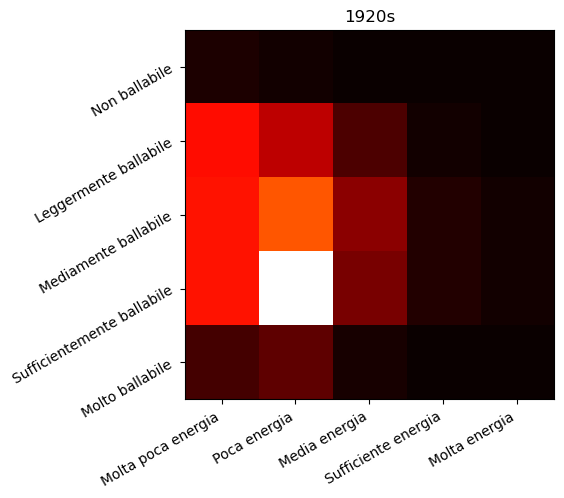

In [20]:
YEAR = OLAP[0]
plt.imshow(YEAR, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(quantize_energy)), labels=quantize_energy, rotation=30, ha='right')
plt.yticks(np.arange(len(quantize_danceability)), labels=quantize_danceability, rotation=30)
plt.title('1920s')
plt.show()

Vediamo come questa heatmap cambia andando avanti con gli anni.

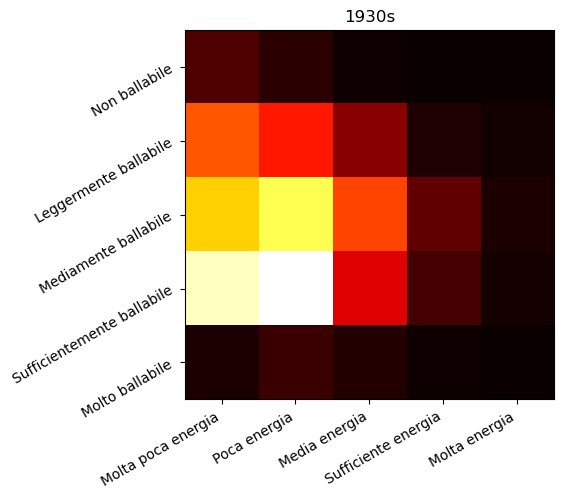

In [21]:
YEAR = OLAP[1]
plt.imshow(YEAR, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(quantize_energy)), labels=quantize_energy, rotation=30, ha='right')
plt.yticks(np.arange(len(quantize_danceability)), labels=quantize_danceability, rotation=30)
plt.title('1930s')
plt.show()

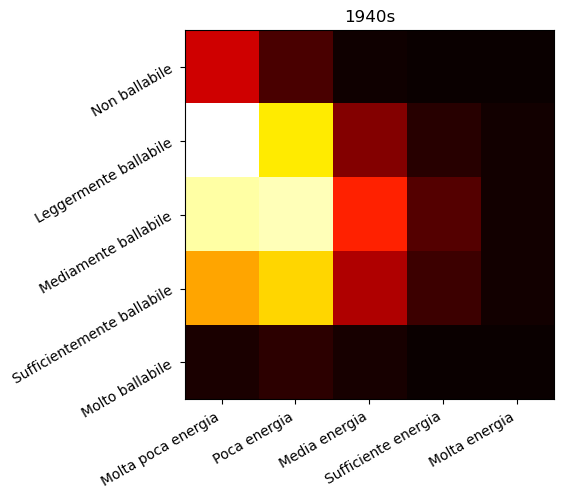

In [22]:
YEAR = OLAP[2]
plt.imshow(YEAR, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(quantize_energy)), labels=quantize_energy, rotation=30, ha='right')
plt.yticks(np.arange(len(quantize_danceability)), labels=quantize_danceability, rotation=30)
plt.title('1940s')
plt.show()

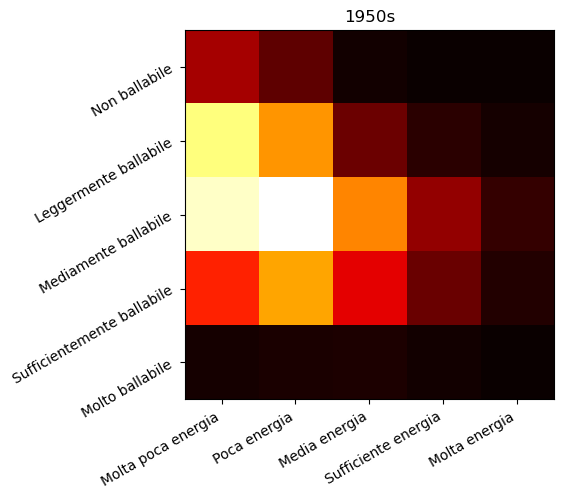

In [23]:
YEAR = OLAP[3]
plt.imshow(YEAR, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(quantize_energy)), labels=quantize_energy, rotation=30, ha='right')
plt.yticks(np.arange(len(quantize_danceability)), labels=quantize_danceability, rotation=30)
plt.title('1950s')
plt.show()

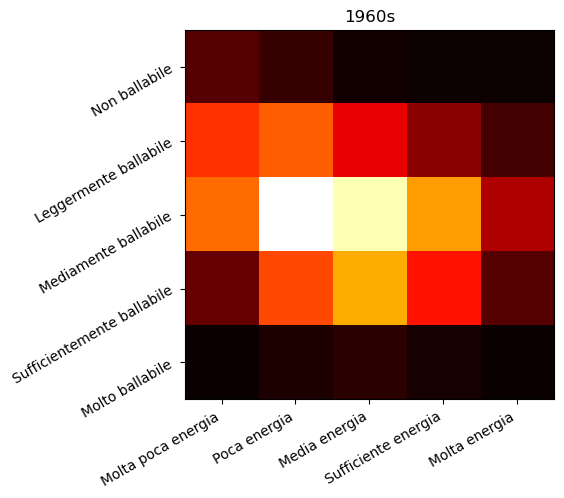

In [24]:
YEAR = OLAP[4]
plt.imshow(YEAR, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(quantize_energy)), labels=quantize_energy, rotation=30, ha='right')
plt.yticks(np.arange(len(quantize_danceability)), labels=quantize_danceability, rotation=30)
plt.title('1960s')
plt.show()

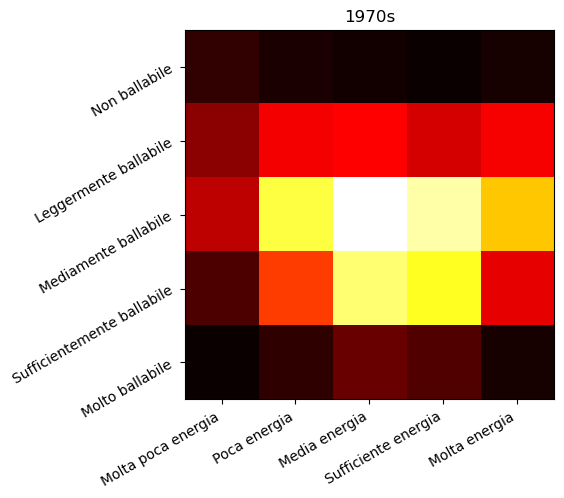

In [25]:
YEAR = OLAP[5]
plt.imshow(YEAR, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(quantize_energy)), labels=quantize_energy, rotation=30, ha='right')
plt.yticks(np.arange(len(quantize_danceability)), labels=quantize_danceability, rotation=30)
plt.title('1970s')
plt.show()

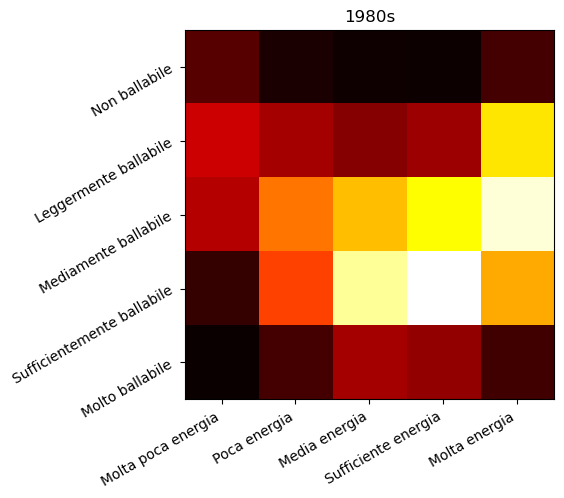

In [26]:
YEAR = OLAP[6]
plt.imshow(YEAR, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(quantize_energy)), labels=quantize_energy, rotation=30, ha='right')
plt.yticks(np.arange(len(quantize_danceability)), labels=quantize_danceability, rotation=30)
plt.title('1980s')
plt.show()

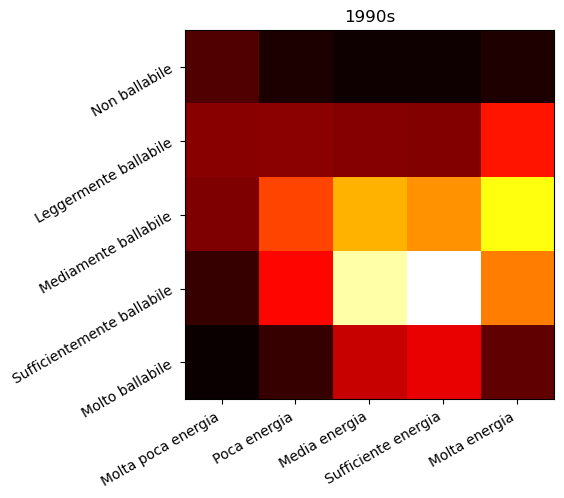

In [27]:
YEAR = OLAP[7]
plt.imshow(YEAR, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(quantize_energy)), labels=quantize_energy, rotation=30, ha='right')
plt.yticks(np.arange(len(quantize_danceability)), labels=quantize_danceability, rotation=30)
plt.title('1990s')
plt.show()

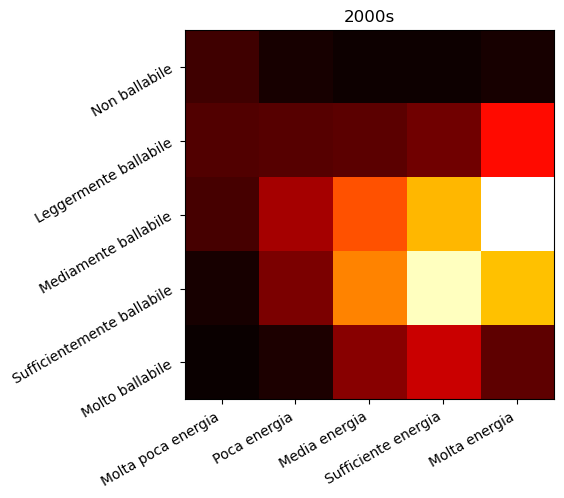

In [28]:
YEAR = OLAP[8]
plt.imshow(YEAR, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(quantize_energy)), labels=quantize_energy, rotation=30, ha='right')
plt.yticks(np.arange(len(quantize_danceability)), labels=quantize_danceability, rotation=30)
plt.title('2000s')
plt.show()

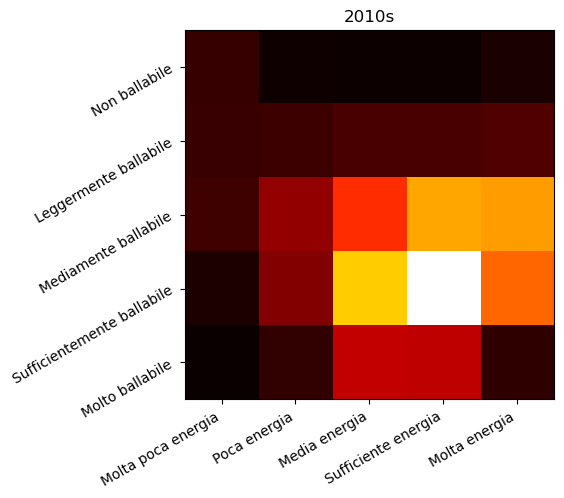

In [29]:
YEAR = OLAP[9]
plt.imshow(YEAR, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(quantize_energy)), labels=quantize_energy, rotation=30, ha='right')
plt.yticks(np.arange(len(quantize_danceability)), labels=quantize_danceability, rotation=30)
plt.title('2010s')
plt.show()

Quali considerazioni possiamo trarre dalle heatmap? Vediamo il punto bianco muoversi sulle mappe e da questo possiamo dedurre che non necessariamente energy e danceability vanno di pari passo: proviamo ad analizzare i dati con calcoli statistici, partendo dalla covarianza.

In [30]:
energy_danceability_covariance = np.cov(songs["energy"], songs["danceability"])
print(energy_danceability_covariance)

[[0.0711774  0.0102245 ]
 [0.0102245  0.03070388]]


La covarianza non è sufficientemente descrittiva, quindi proviamo con la correlazione.

In [31]:
energy_danceability_correlation = np.corrcoef(songs["energy"], songs["danceability"])
print(energy_danceability_correlation)

[[1.         0.21871287]
 [0.21871287 1.        ]]


Dal valore basso della correlazione, possiamo notare che energy e danceability non variano necessariamente insieme.

### Boxplot

Proviamo a fare una visualizzazione con boxplot per l'anno e calcoliamone le statistiche principali usando la funzione describe(). In questo modo possiamo notare che nel grafico sono rappresentati il minimo, il massimo, la media e i vari percentili.

In [32]:
songs["year"].describe()

count    167367.000000
mean       1977.246028
std          25.564911
min        1921.000000
25%        1957.000000
50%        1978.000000
75%        1999.000000
max        2020.000000
Name: year, dtype: float64

<Axes: >

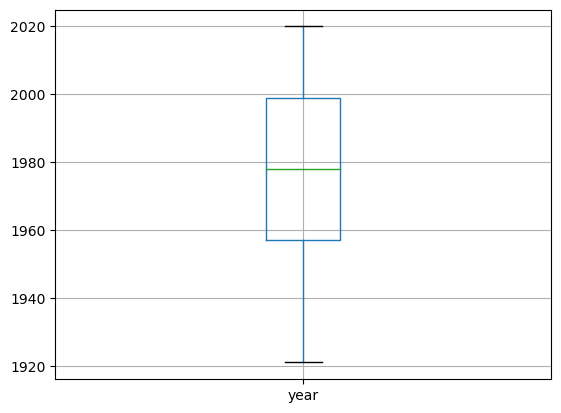

In [33]:
songs.boxplot(column="year")

### Diagramma a barre

Vogliamo creare un diagramma a barre per rappresentare quante canzoni sono state pubblicate in ogni anno. Per prima cosa creiamo una nuova tabella con due colonne: l'anno e il numero di canzoni pubblicate.

In [34]:
songs_by_year = songs.groupby('year').size().reset_index(name='song_count')
print("Number of songs published in each year:")
print(songs_by_year)

Number of songs published in each year:
    year  song_count
0   1921         118
1   1922          72
2   1923         169
3   1924         237
4   1925         263
..   ...         ...
95  2016        1950
96  2017        1975
97  2018        1975
98  2019        1968
99  2020        1677

[100 rows x 2 columns]


Ora possiamo disegnare il diagramma a barre.

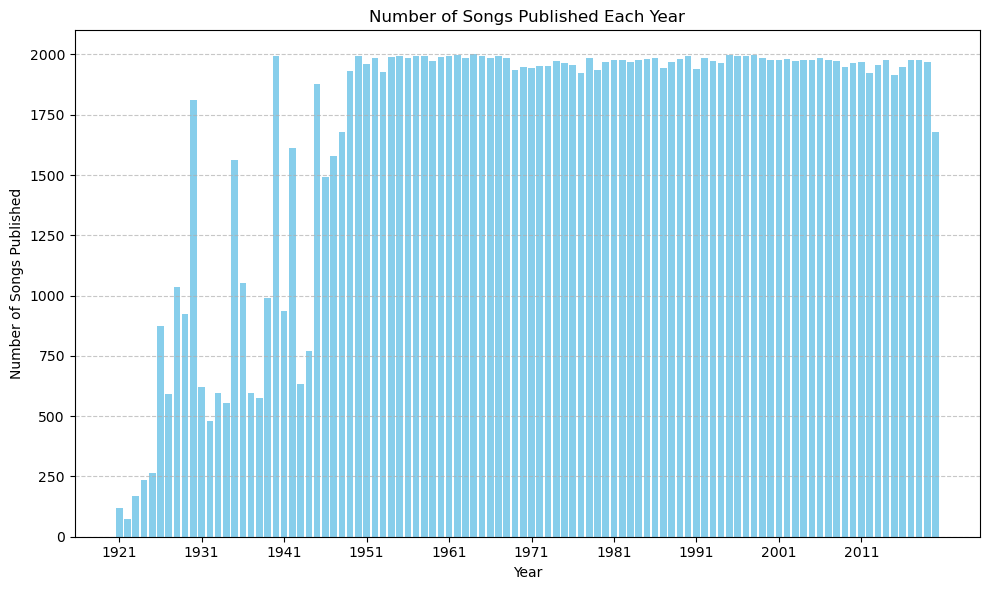

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(songs_by_year['year'], songs_by_year['song_count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Songs Published')
plt.title('Number of Songs Published Each Year')
xticks_positions = songs_by_year['year'][::10]
plt.xticks(xticks_positions) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Il taglio a quota 2000 canzoni può indicare un limite nel dataset: verifichiamolo con la funzione describe().

In [36]:
songs_by_year["song_count"].describe()

count     100.000000
mean     1673.670000
std       561.906748
min        72.000000
25%      1677.000000
50%      1968.500000
75%      1984.000000
max      2000.000000
Name: song_count, dtype: float64

## Test statistico

Vogliamo eseguire un t-test seguendo i 5 passi necessari.
1. Specificare l'ipotesi<br>
Chiamiamo $H_0$ l'ipotesi secondo cui la media della popolarità delle canzoni del campione è vicina alla media della popolarità delle canzoni della popolazione. Chiamiamo $H_a$ l'ipotesi secondo cui la media della popolarità del campione differisce dalla media della popolarità della popolazione.
2. Determinare le dimensioni del campione per il test<br>
Scegliamo come campione le canzoni pubblicate in un determinato anno randomico. Il campione ha almeno 30 punti? Sì perché il valore minimo di song_count è 72. Per il campione scelto vale che 10\*n < N? Sì perché il massimo di song_count è 2000 e 10\*2000 < 169319.
3. Scegliere un livello di significatività<br>
Fissiamo la confidenza al 95% e il livello di significatività a 0.05.
4. Raccogliere i dati<br>
Proviamo a calcolare un p-value per ogni decennio.

In [37]:
year_rand = random.randint(1921, 1930)
t_value, p_value = stats.ttest_ind(songs.loc[songs["year"]==year_rand, "popularity"], songs["popularity"])
print("1920s (", year_rand, ") ", p_value)
year_rand = random.randint(1931, 1940)
t_value, p_value = stats.ttest_ind(songs.loc[songs["year"]==year_rand, "popularity"], songs["popularity"])
print("1930s (", year_rand, ") ", p_value)
year_rand = random.randint(1941, 1950)
t_value, p_value = stats.ttest_ind(songs.loc[songs["year"]==year_rand, "popularity"], songs["popularity"])
print("1940s (", year_rand, ") ", p_value)
year_rand = random.randint(1951, 1960)
t_value, p_value = stats.ttest_ind(songs.loc[songs["year"]==year_rand, "popularity"], songs["popularity"])
print("1950s (", year_rand, ") ", p_value)
year_rand = random.randint(1961, 1970)
t_value, p_value = stats.ttest_ind(songs.loc[songs["year"]==year_rand, "popularity"], songs["popularity"])
print("1960s (", year_rand, ") ", p_value)
year_rand = random.randint(1971, 1980)
t_value, p_value = stats.ttest_ind(songs.loc[songs["year"]==year_rand, "popularity"], songs["popularity"])
print("1970s (", year_rand, ") ", p_value)
year_rand = random.randint(1981, 1990)
t_value, p_value = stats.ttest_ind(songs.loc[songs["year"]==year_rand, "popularity"], songs["popularity"])
print("1980s (", year_rand, ") ", p_value)
year_rand = random.randint(1991, 2000)
t_value, p_value = stats.ttest_ind(songs.loc[songs["year"]==year_rand, "popularity"], songs["popularity"])
print("1990s (", year_rand, ") ", p_value)
year_rand = random.randint(2001, 2010)
t_value, p_value = stats.ttest_ind(songs.loc[songs["year"]==year_rand, "popularity"], songs["popularity"])
print("2000s (", year_rand, ") ", p_value)
year_rand = random.randint(2011, 2020)
t_value, p_value = stats.ttest_ind(songs.loc[songs["year"]==year_rand, "popularity"], songs["popularity"])
print("2010s (", year_rand, ") ", p_value)

1920s ( 1930 )  0.0
1930s ( 1933 )  7.658653217547497e-178
1940s ( 1948 )  0.0
1950s ( 1960 )  5.416717461888877e-162
1960s ( 1962 )  2.4478669490475577e-119
1970s ( 1974 )  0.19817736729487231
1980s ( 1989 )  5.88031531390356e-48
1990s ( 1995 )  2.376761338545072e-156
2000s ( 2007 )  0.0
2010s ( 2017 )  0.0


5. Decidere se rigettare o accettare l'ipotesi nulla<br>
Poiché il p-value, in generale, è molto minore del livello di significatività, possiamo rigettare l'ipotesi nulla in favore di quella alternativa. Per questo possiamo dire che la media della popolarità delle canzoni del campione non è vicina alla media della popolarità delle canzoni della popolazione, ma la media della popolarità del campione differisce dalla media della popolarità della popolazione.

## Metodo predittivo

Vogliamo provare a predire se un brano è stato pubblicato prima o dopo il 1971 partendo dai dati numerici delle altre colonne. Iniziamo con l'eliminazione delle colonne testuali, oltre a quella che vogliamo predire, e normalizziamo i valori.

In [38]:
from sklearn.preprocessing import MinMaxScaler
X = songs.drop(["year", "name", "artists", "quantize_year", "quantize_danceability", "quantize_energy"], axis=1)
X.head()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Creiamo la nuova colonna.

In [39]:
songs["after_1971"] = (songs["year"] > 1971).astype(int)

A questo punto applichiamo la regressione logistica.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
y = songs["after_1971"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regression = LogisticRegression(max_iter=10000)
reg = regression.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test, y_test))

0.9012666547170939


Verifichiamo la correttezza della regressione logistica mediante lo scarto medio assoluto (MAE - Mean Absolute Error), l’errore quadratico medio (MSE - Mean Squared Error) e la radice dell’errore quadratico medio (RMSE - Root of Mean Squared Error).

In [41]:
import sklearn.metrics as metrics
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.09873334528290613
MSE: 0.09873334528290613
RMSE: 0.31421862656899596


Ora calcoliamo il modello nullo, il suo score e i suoi MAE, MSE e RMSE.

In [42]:
null_model_y = np.ones(len(y_test))*y_train.mode().values[0]
print(reg.score(X_test, null_model_y))

0.5903088964569516


In [43]:
print ('MAE (null):', metrics.mean_absolute_error(y_test, null_model_y))
print ('MSE (null):', metrics.mean_squared_error(y_test, null_model_y))
print ('RMSE (null):', np.sqrt(metrics.mean_squared_error(y_test, null_model_y)))

MAE (null): 0.429258529007588
MSE (null): 0.429258529007588
RMSE (null): 0.6551782421658918


Possiamo notare che, in entrambi i casi, MAE e MSE sono uguali.

## Clustering

Vogliamo eseguire un clustering che tenga conto di alcune caratteristiche del nostro dataset: acousticness, instrumentalness, liveness, loudness, speechiness, tempo, valence, mode, key, explicit, decade, danceability, energy, popularity. Definiamo quindi una funzione che ci permetta di calcolare il numero ideale di cluster.

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def optimal_number_of_clusters(data, columns, max_clusters=15):
    max_score = -1
    optimal_clusters = 2
    silhouette_avg = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        cluster_labels = kmeans.fit_predict(data[columns])
        silhouette_avg.append(silhouette_score(data[columns], cluster_labels))
        if silhouette_avg[n_clusters-2] > max_score:
            max_score = silhouette_avg[n_clusters-2]
            optimal_clusters = n_clusters
    plt.plot(range(2, max_clusters + 1), silhouette_avg, marker='o')
    plt.title("Coefficiente di silhouette e numero di cluster")
    plt.xlabel("Numero di cluster")
    plt.ylabel("Coefficiente di silhouette")
    plt.show()
    return optimal_clusters

Decidiamo di non eseguire il cluster su tutto il dataset, ma solo su un campione di 1500 canzoni per decennio (subset).

In [45]:
songs["decade"] = (songs["year"] // 10) * 10
def sample_n_per_decade(df, n):
    return df.groupby('decade').apply(lambda x: x.sample(n=min(n, len(x)))).reset_index(drop=True)
n_samples_per_decade = 1500
subset = sample_n_per_decade(songs, n_samples_per_decade)
subset.head()

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,valence,mode,key,popularity,explicit,quantize_year,quantize_danceability,quantize_energy,after_1971,decade
0,Labios de Coty - Instrumental (Remasterizado),Francisco Canaro,219533,1929,0.9510,0.400,0.4860,0.696,0.2140,-10.363,...,0.485,1,5,0,0,1920s,Mediamente ballabile,Media energia,0,1920
1,Часть 8.2 - На Западном фронте без перемен,Эрих Мария Ремарк,105300,1929,0.0606,0.699,0.3080,0.000,0.2660,-18.083,...,0.728,1,1,0,1,1920s,Sufficientemente ballabile,Poca energia,0,1920
2,"Chopin: Scherzo No. 1 in B Minor, Op. 20","Frédéric Chopin, Arthur Rubinstein",502813,1928,0.9920,0.330,0.0751,0.889,0.0939,-21.187,...,0.113,0,11,4,0,1920s,Leggermente ballabile,Molta poca energia,0,1920
3,Who'sit,Louis Armstrong & His Hot Five,175507,1925,0.9960,0.716,0.1730,0.917,0.1180,-16.527,...,0.645,0,3,1,0,1920s,Sufficientemente ballabile,Molta poca energia,0,1920
4,Down Hearted Blues,Jimmy Rushing And His Orchestra,207333,1924,0.4690,0.590,0.3700,0.000,0.3040,-11.666,...,0.628,1,8,0,0,1920s,Mediamente ballabile,Poca energia,0,1920


Quindi definiamo le colonne che vogliamo tenere, normalizziamo i valori e chiamiamo la funzione optimal_number_of_clusters su subset.

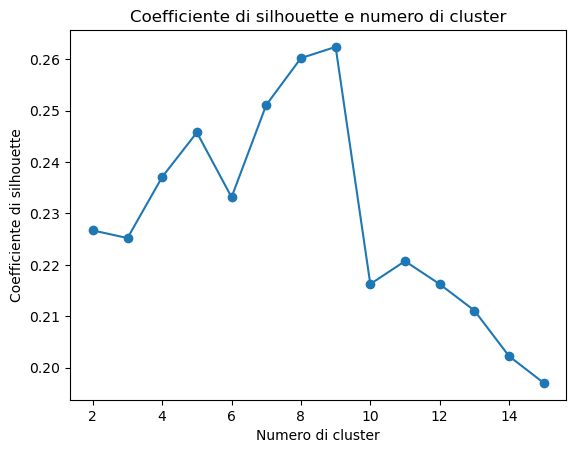

Optimal number of clusters: 9


In [46]:
columns = ["acousticness", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "mode", "key", "explicit", "decade", "danceability", "energy", "popularity"]
scaler = MinMaxScaler()
subset[columns] = scaler.fit_transform(subset[columns])
optimal_clusters = optimal_number_of_clusters(subset, columns)
print("Optimal number of clusters:", optimal_clusters)

Adesso che abbiamo il numero ottimale di cluster possiamo eseguire il clustering vero e proprio.

In [47]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0, n_init="auto").fit(subset[columns])

Vediamo alcune visualizzazioni: poiché utilizziamo molte colonne del dataset per eseguire questo clustering abbiamo molte visualizzazioni possibili date dalla combinazione delle stesse. Visualizzeremo solo alcune tra quelle che riteniamo più significative.

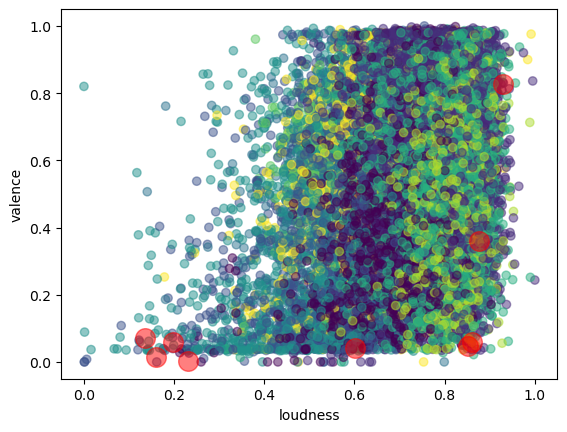

In [48]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(subset[columns[3]], subset[columns[6]], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel(columns[3])
plt.ylabel(columns[6])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)

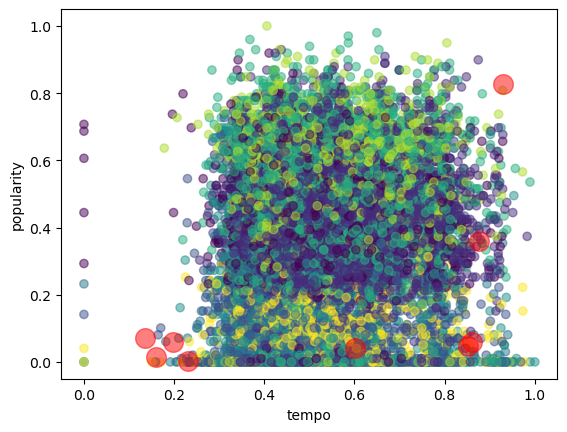

In [49]:
plt.scatter(subset[columns[5]], subset[columns[13]], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel(columns[5])
plt.ylabel(columns[13])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)

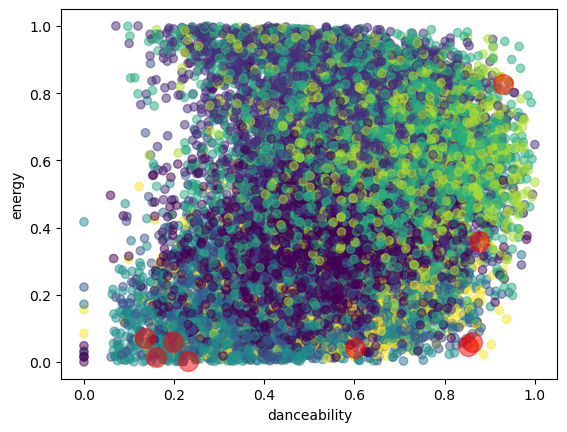

In [50]:
plt.scatter(subset[columns[11]], subset[columns[12]], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel(columns[11])
plt.ylabel(columns[12])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)

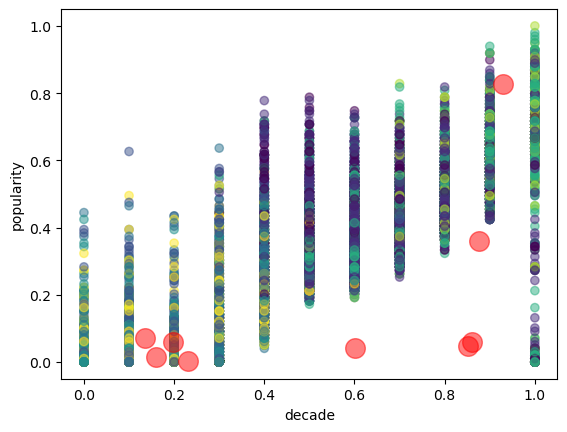

In [51]:
plt.scatter(subset[columns[10]], subset[columns[13]], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel(columns[10])
plt.ylabel(columns[13])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)

Questa è una delle rappresentazioni più significativa per il nostro obiettivo analitico perché permette di visualizzare i cluster suddivisi sui vari decenni. 

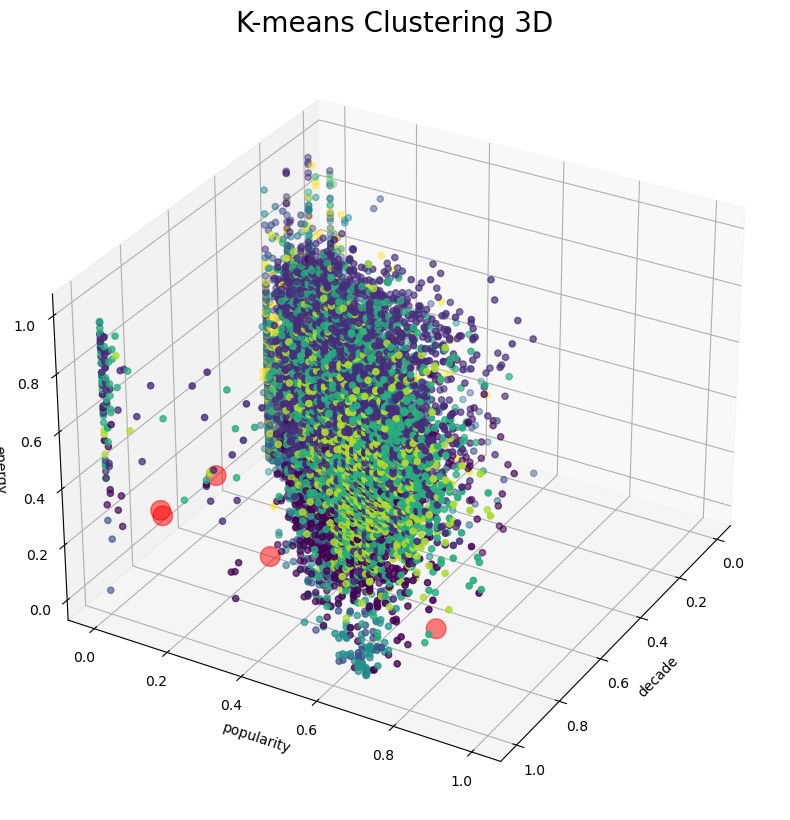

In [52]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(subset[columns[10]], subset[columns[13]], subset[columns[12]], c=labels, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, alpha=0.5)
ax.set_xlabel(columns[10])
ax.set_ylabel(columns[13])
ax.set_zlabel(columns[12])
ax.set_title('K-means Clustering 3D', fontsize=20)
ax.view_init(azim=30)
plt.show()

Da questa visualizzazione 3D possiamo vedere come le canzoni più recenti sono più popolari: è un fatto che ci possiamo aspettare. Infatti lo streaming, e in particolare Spotify, è nato solo nell'ultimo decennio: questo non implica che le canzoni uscite prima del 2006 (anno della fondazione di Spotify) non vengano mai ascoltate sulla piattaforma, ma non ci permette di sapere la popolarità effettiva di una canzone.

## Conclusioni


Lavorando sulle caratteristiche delle canzoni su un intervallo di 100 anni abbiamo potuto analizzare come quest'ultime sono cambiate ma come, allo stesso tempo, non siano direttamente collegate all'anno di uscita del brano. Possiamo ipotizzare che questo derivi dall'organizzazione dei dati, ma anche dalla presenza di svariati generi. Un esempio di organizzazione dei dati è il fenomeno dei remastered, ovvero brani rimasterizzati anni dopo la loro uscita, quindi "ripubblicati". Invece, per quanto riguarda la presenza dei generi, è più probabile che un brano di un determinato genere sia classificato insieme a uno dello stesso genere uscito anni dopo rispetto ad un suo contemporaneo ma di genere opposto. Questa è solamente una supposizione basata su esperienza personale.<br>
I dati utilizzati nel clustering sono scelti randomicamente, pertanto dipendono dal singolo run. Possiamo dire che il modo in cui i dati vengono campionati influenza notevolmente l'algoritmo per la scelta del numero di cluster: infatti abbiamo casi in cui il numero ottimale di cluster è 2 e altri in  cui si arriva a 9.